## Tworzenie drzewa kodującego

### Implementacja algorytmu

In [1]:
class MinPriorityQueue:
    def __init__(self, maxsize=128):
        if not isinstance(maxsize, int):
            raise TypeError(f"expected 'int', got {str(type(maxsize))[7:-1]}")
        if maxsize <= 0:
            raise ValueError(f"cannot create a {self.__class__.__name__} of a max size {maxsize}")
        self.heap = [None] * maxsize  # Allocate a constant memory space
        self._free_idx = 0

    def __bool__(self):
        return bool(self._free_idx)
    
    def __len__(self):
        return self._free_idx
    
    @property
    def heap_size(self):
        return len(self.heap)
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, priority: int, obj: object):
        if len(self) == self.heap_size:
            raise OverflowError(f'insert in a completely filled {self.__class__.__name__}')
        # Add a value as the last node of our Complete Binary Tree
        self.heap[self._free_idx] = (priority, obj)
        # Fix heap in order to satisfy a min-heap property
        self._free_idx += 1
        self._heapify_up(len(self) - 1)
        
    def peek(self) -> object:
        return None if not self.heap else self.heap[0]  # Return a priority-element pair
        
    def poll(self) -> object:
        if len(self) == 0:
            raise IndexError(f'remove_min from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last_idx = self._free_idx - 1
        last = self.heap[last_idx]
        self.heap[last_idx] = None
        self._free_idx -= 1
        if len(self) > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a min-heap property
            self._heapify_down(0, len(self))
        return removed  # Return a priority-element pair
    
    def _swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            # Compare the priority of elements and move up the element
            # of a lower priority (if it is below an element of a higher priority)
            if self.heap[curr_idx][0] < self.heap[parent_idx][0]:
                self._swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):
        # Loop till the current node has a child of a smaller priority than 
        # itself. We assume that when we enter a node which both children 
        # have larger priority than this node, a subtree which a current node 
        # is a root of must fulfill a min-heap property
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            smallest_idx = curr_idx

            if l < end_idx:
                if self.heap[l][0] < self.heap[curr_idx][0]: 
                    smallest_idx = l
                if r < end_idx and self.heap[r][0] < self.heap[smallest_idx][0]:
                    smallest_idx = r

            if smallest_idx != curr_idx:
                self._swap(curr_idx, smallest_idx)
                curr_idx = smallest_idx
            else:
                break


class Node:
    def __init__(self):
        self.left = None
        self.right = None
        
                
def create_coding_tree(freqs: 'array of char-frequency pairs') -> Node:
    n = len(freqs)
    # Create a priority queue of the max size equal to the number
    # of characters to encode
    pq = MinPriorityQueue(n)

    # Add all char-frequency pairs to the queue as Node objects
    for i in range(n):
        node = Node()
        # Add a char property (only leaf nodes will have this property)
        node.char = freqs[i][0]
        # Insert a node with its priority (frequency of a character)
        pq.insert(freqs[i][1], node)

    # Create a coding tree
    while True:
        # Take a pair of two entries of the lowest priority (frequency)
        x_priority, x_node = pq.poll()
        y_priority, y_node = pq.poll()
        # Create a new node and link two nodes from above to this node
        node = Node()
        node.left  = y_node
        node.right = x_node
        # Insert this node to the priority queue only if a priority queue
        # hasn't been exhausted yet
        if pq:
            pq.insert(x_priority + y_priority, node)
        # Else, return a resulting root node of the encoding tree
        else:
            return node

###### Kilka testów

In [2]:
freqs = [('a', 700), ('b', 200), ('c', 180), ('d', 120), ('e', 70), ('f', 30)]

ct = create_coding_tree(freqs)
print(ct)

##### Pomocnicze

In [3]:
def complete_tree_string(values):
    if values:
        just = 0
        data = []

        limit = 1
        values_row = []
        branches_row = []
        prev_nodes = 0

        for i in range(1, len(values) + 1):
            curr_nodes = i - prev_nodes
            val_str = str(values[i-1])
            just = max(just, len(val_str))
            values_row.append(val_str)
            right_child_idx = 2 * i
            left_child_idx = right_child_idx - 1
            if left_child_idx < len(values):
                branches_row.append('/')
            if right_child_idx < len(values):
                branches_row.append('\\')

            if curr_nodes == limit: 
                prev_nodes = i
                limit *= 2
                data.append([values_row, branches_row])
                values_row = []
                branches_row = []

        if values_row:
            data.append([values_row, branches_row])

        begin_sep = sep = 3 if just % 2 else 2
        data_iter = iter(data[::-1])
        result = [''] * (len(data) * 2 - 1)
        result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

        # Format the tree string
        for i, (values, branches) in enumerate(data_iter):
            mul = 2 * i + 1
            # Values
            indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
            sep = 2 * sep + just
            result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
            # Branches
            branch_indent = (3 * indent + just) // 4
            branches_row = []
            d_indent = indent - branch_indent
            branches_sep = ' ' * (2 * (d_indent - 1) + just)
            for i in range(0, len(branches), 2):
                branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1] if i + 1 < len(branches) else ''}")
            result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

        return '\n'.join(result)
    else:
        return ''

In [4]:
def binary_tree_string(tree_root, *, fn: 'function to get a value of a node' = lambda node: str(node.val)):
    if not tree_root: return ''

    # Store data from a tree
    data = []
    lvl_nodes = [tree_root]
    just = 1

    while True:
        if not lvl_nodes: break

        curr_row = []
        branches = []
        next_nodes = []

        if not any(lvl_nodes):
            break

        for node in lvl_nodes:
            if not node:
                curr_row.append('')
                branches.extend([' ', ' '])
                next_nodes.extend([None, None])
            else:
                val = fn(node)
                just = max(len(val), just)
                curr_row.append(val)

                if node.left:
                    next_nodes.append(node.left)
                    branches.append('/')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

                if node.right:
                    next_nodes.append(node.right)
                    branches.append('\\')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

        data.append((curr_row, branches))
        lvl_nodes = next_nodes

    begin_sep = sep = 3 if just % 2 else 2
    data_iter = iter(data[::-1])
    result = [''] * (len(data) * 2 - 1)
    result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

    # Format the tree string
    for i, (values, branches) in enumerate(data_iter):
        mul = 2 * i + 1
        # Values
        indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
        sep = 2 * sep + just
        result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
        # Branches
        branch_indent = (3 * indent + just) // 4
        branches_row = []
        d_indent = indent - branch_indent
        branches_sep = ' ' * (2 * (d_indent - 1) + just)
        for i in range(0, len(branches), 2):
            branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1]}")
        result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

    return '\n'.join(result)

###### Kilka testów

In [5]:
freqs = [('a', 700), ('b', 200), ('c', 180), ('d', 120), ('e', 70), ('f', 30)]

q = MinPriorityQueue(len(freqs))
for freq in freqs:
    q.insert(freq[1], freq[0])
    
print(complete_tree_string(q.heap))
    
while q:
    print('\n\nRemoved:', q.poll())
    print('Heap:   ', q.heap)
    print('\nTree representation:')
    print(complete_tree_string([v for v in q.heap if v is not None]))

                  (30, 'f') 
                /            \
      (120, 'd')              (70, 'e') 
       /      \                /      
(700, 'a')  (180, 'c')  (200, 'b')


Removed: (30, 'f')
Heap:    [(70, 'e'), (120, 'd'), (200, 'b'), (700, 'a'), (180, 'c'), None]

Tree representation:
                  (70, 'e') 
                /            \
      (120, 'd')              (200, 'b')
       /      \
(700, 'a')  (180, 'c')


Removed: (70, 'e')
Heap:    [(120, 'd'), (180, 'c'), (200, 'b'), (700, 'a'), None, None]

Tree representation:
                  (120, 'd')
                /            \
      (180, 'c')              (200, 'b')
       /      
(700, 'a')


Removed: (120, 'd')
Heap:    [(180, 'c'), (700, 'a'), (200, 'b'), None, None, None]

Tree representation:
      (180, 'c')
       /      \
(700, 'a')  (200, 'b')


Removed: (180, 'c')
Heap:    [(200, 'b'), (700, 'a'), None, None, None, None]

Tree representation:
      (200, 'b')
       /      
(700, 'a')


Removed: (200, '

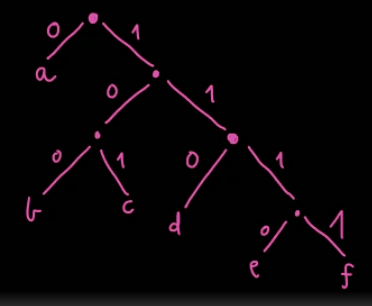

In [6]:
freqs = [('a', 700), ('b', 200), ('c', 180), ('d', 120), ('e', 70), ('f', 30)]

ct = create_coding_tree(freqs)
print(binary_tree_string(ct, fn=lambda node: str(node.char) if hasattr(node, 'char') else '.'))

                              .
                      /               \
              a                               .
                                          /       \
                                      .               .
                                    /   \           /   \
                                  b       c       d       .
                                                         / \
                                                        e   f


## Przypisywanie kodów znakom

W poniższej implementacji wykorzystujemy zaimplementowany wyżej algorytm, który tworzy drzewo kodujące.

### Implementacja algorytmu

In [7]:
def create_huffman_codes(ct: 'Huffman coding tree'):
    # Traverse a tree using a DFS algorithm and create codes of characters
    # (we assume that a left branch corresponds to the '0' code and a right
    # one to the '1' code)
    result = []
    
    # Create a temporary array in which a resulting code of a character will
    # be temporarily stored (created by appending subsequent digits of a code)
    code = []
    
    def encode(node):
        # If we entered the last node, store a character and its code in
        # a resulting array
        if node.left is node.right is None:
            return result.append((node.char, ''.join(code)))
            
        if node.left:
            code.append('0')
            encode(node.left)
            code.pop()
        if node.right:
            code.append('1')
            encode(node.right)
            code.pop()
        
    encode(ct)
    
    return result

###### Kilka testów

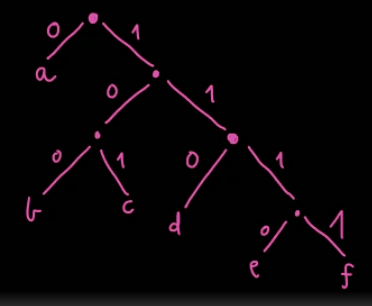

In [8]:
freqs = [('a', 700), ('b', 200), ('c', 180), ('d', 120), ('e', 70), ('f', 30)]

ct = create_coding_tree(freqs)
print(create_huffman_codes(ct))

[('a', '0'), ('b', '100'), ('c', '101'), ('d', '110'), ('e', '1110'), ('f', '1111')]


In [9]:
S = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "o", "p", "r", "s", "t", "u", "w", "y", "z", "q"]
F = [865, 395, 777, 912, 431, 42, 266, 989, 524, 498, 415, 941, 803, 850, 311, 992, 489, 367, 598, 914, 930, 224, 517]
freqs = list(zip(S, F))

ct = create_coding_tree(freqs)
print(create_huffman_codes(ct))

[('z', '0000000'), ('f', '0000001'), ('g', '000001'), ('i', '00001'), ('q', '00010'), ('j', '00011'), ('r', '0010'), ('h', '0011'), ('l', '0100'), ('y', '0101'), ('s', '01100'), ('e', '01101'), ('w', '0111'), ('d', '1000'), ('a', '1001'), ('o', '1010'), ('k', '10110'), ('b', '10111'), ('m', '1100'), ('c', '1101'), ('t', '11100'), ('p', '11101'), ('u', '1111')]


## Przywracanie początkowej kolejności znaków

Poniższa funkcja służy do ustawienia par znak-kod w taki sposób, że każdy ze znaków wystąpi na tej pozycji, na której występował w tablicy wyjściowej.

In [10]:
def reorder_codes(C: 'array of character-code pairs', F: 'initial array of char-frequency pairs'):
    n = len(C)
    # Create an array of char-index pairs
    A = [(F[i][0], i) for i in range(n)]

    # Sort the array created above and the array of char-code pairs by Unicode
    # codes of characters
    A.sort(key=lambda pair: pair[0])
    C.sort(key=lambda pair: pair[0])

    # Create a temporary array to store information if the current entry was
    # placed on its final position
    T = [False] * n

    # Reorder the array or char-code pairs so that all entries are stored
    # in the same order they were stored in the S array
    for i in range(n):
        if not T[i]:
            swap(C, i, A[i][1])
            T[A[i][1]] = True


def swap(A, i, j):
    A[i], A[j] = A[j], A[i]

##### Albo łatwiej (z wykorzystaniem sortowania logicznego):

In [11]:
def get_reordered_codes(C: 'array of char-code pairs', F: 'initial array of char-frequency pairs'):
    n = len(C)
    ind_F = sorted(range(n), key=lambda i: F[i][0])
    ind_C = sorted(range(n), key=lambda i: C[i][0])
    return [C[ind_C[ind_F[i]]] for i in range(n)]

###### Kilka testów

In [12]:
import random

freqs = [('a', 700), ('b', 200), ('c', 180), ('d', 120), ('e', 70), ('f', 30)]
random.shuffle(freqs)
print('Freqs:', freqs)

ct = create_coding_tree(freqs)
codes = create_huffman_codes(ct)
reorder_codes(codes, freqs)
print(codes)
# LUB
codes = get_reordered_codes(codes, freqs)
print(codes)

Freqs: [('c', 180), ('b', 200), ('e', 70), ('f', 30), ('a', 700), ('d', 120)]
[('c', '101'), ('b', '100'), ('e', '1110'), ('f', '1111'), ('a', '0'), ('d', '110')]
[('e', '1110'), ('b', '100'), ('a', '0'), ('f', '1111'), ('c', '101'), ('d', '110')]


In [13]:
S = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "o", "p", "r", "s", "t", "u", "w", "y", "z", "q"]
F = [865, 395, 777, 912, 431, 42, 266, 989, 524, 498, 415, 941, 803, 850, 311, 992, 489, 367, 598, 914, 930, 224, 517]
freqs = list(zip(S, F))

ct = create_coding_tree(freqs)
codes = create_huffman_codes(ct)
reorder_codes(codes, freqs)
print(codes)

[('a', '1001'), ('b', '10111'), ('c', '1101'), ('d', '1000'), ('e', '01101'), ('f', '0000001'), ('g', '000001'), ('h', '0011'), ('i', '00001'), ('j', '00011'), ('k', '10110'), ('l', '0100'), ('m', '1100'), ('o', '1010'), ('p', '11101'), ('r', '0010'), ('s', '01100'), ('t', '11100'), ('u', '1111'), ('w', '0111'), ('y', '0101'), ('z', '0000000'), ('q', '00010')]


## Zliczanie łącznej liczby bitów, potrzebnej do zakodowania

Chodzi o zwrócenie sumarycznej liczby bitów (długości finalnego kodu) zakodowanej, przy pomocy kodu Huffmana, informacji. (Dodatkowo porównamy tę liczbę z liczbą bitów, jaka by była konieczna, przy kodowaniu informacji z użyciem kodów o stałej długości).

In [14]:
def calc_huff_bits(C: 'array of char-code pairs', F: 'array of char-frequency pairs') -> int:
    # Calculate total bits required by the huffman encoding
    # (Notice that an array of codes (C array) must be ordered in
    # the same way as the input array of frequencies and corresponding
    # characters to encode)
    total = 0
    for i in range(len(F)):
        total += F[i][1] * len(C[i][1])
    return total

In [15]:
import math

# All codes will have the same lengths
def count_const_bits(freqs):
    n = len(freqs)
    length = math.ceil(math.log(n, 2))
    return sum(freq[1] for freq in freqs) * length

###### Kilka testów

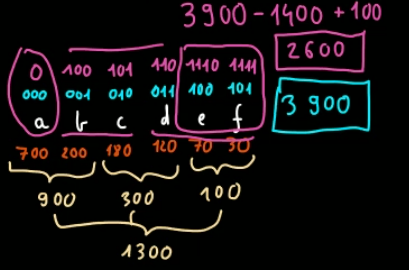

In [16]:
freqs = [('a', 700), ('b', 200), ('c', 180), ('d', 120), ('e', 70), ('f', 30)]

ct = create_coding_tree(freqs)
huff_codes = create_huffman_codes(ct)
reorder_codes(huff_codes, freqs)
print('Total bits for Huffman encoding:', calc_huff_bits(huff_codes, freqs), sep='\n')
print('Total bits for constant length encoding:', count_const_bits(freqs), sep='\n')

Total bits for Huffman encoding:
2600
Total bits for constant length encoding:
3900


In [17]:
S = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "o", "p", "r", "s", "t", "u", "w", "y", "z", "q"]
F = [865, 395, 777, 912, 431, 42, 266, 989, 524, 498, 415, 941, 803, 850, 311, 992, 489, 367, 598, 914, 930, 224, 517]
freqs = list(zip(S, F))

ct = create_coding_tree(freqs)
huff_codes = create_huffman_codes(ct)
reorder_codes(huff_codes, freqs)
print('Total bits for Huffman encoding:', calc_huff_bits(huff_codes, freqs), sep='\n')
print('Total bits for constant length encoding:', count_const_bits(freqs), sep='\n')

Total bits for Huffman encoding:
61477
Total bits for constant length encoding:
70250


## Kodowanie informacji, przy pomocy kodu Huffmana

Oczywiście nie jesteśmy w stanie kodować informacji w Pythonie (w sensie, nie możemy zmienić sposobu zapisu danych w pamięci). Poniższy algorytm jedynie ma na celu utworzenie ciągu tekstowego, który będzie przedstawiał, jak wyglądałby dany tekst, otrzymany na wejściu, po zapisaniu go, przy pomocy kodu Huffmana.

### Implementacja #1
##### Z użyciem słownika

In [18]:
from collections import defaultdict


def count_freqs(string):
    # We will use a dictionary to store counts of chars
    counts = defaultdict(int)
    for char in string:
        counts[char] += 1
    return list(counts.items())
        
    
def huffman_encode(string: 'input string to encode', *, codes: 'codes of characters' = None):
    if not codes:
        freqs = count_freqs(string)
        ct    = create_coding_tree(freqs)
        codes = {char: code for char, code in create_huffman_codes(ct)}
    # Start encoding an input string
    n = len(string)
    res = [None] * n
    for i in range(n):
        res[i] = codes[string[i]]
    
    return ''.join(res)

###### Kilka testów

In [19]:
string = 'ala ma kota i nie ma psa'

# If we already created a coding tree before, we can create a codes dictionary and pass it to a function
freqs = count_freqs(string)
ct = create_coding_tree(freqs)
codes = {char: code for char, code in create_huffman_codes(ct)}
print(huffman_encode(string, codes=codes))

0111010110001101101100000001110011000101000010001000001100011011000011111101


In [20]:
string = 'Python programming language is so cool!'

print(huffman_encode(string))

1000100000100100000000001000110111110100001010101000010001111111111001001110101111000001001110100101000110111100011100111010111101010011001001010010110010000


### Implementacja #2
##### Z użyciem tablicy

In [21]:
def count_freqs(string, min_ord, max_ord):
    # We will use a an array to store counts of chars
    n = max_ord - min_ord + 1
    counts = [0] * n
    for char in string:
        counts[ord(char) - min_ord] += 1
    return [(chr(min_ord + i), counts[i]) for i in range(n) if counts[i]]
        
    
def minmax_ord(S: 'string'):
    n = len(S)
    min_i = max_i = n - 1
    for i in range(0, n, 2):
        if S[i] > S[i - 1]:
            if S[i] > S[max_i]:     max_i = i
            if S[i - 1] < S[min_i]: min_i = i - 1
        else:
            if S[i - 1] > S[max_i]: max_i = i - 1
            if S[i] < S[min_i]:     min_i = i
    return ord(S[min_i]), ord(S[max_i])
    
    
def create_codes(freqs: 'array of frequency-char pairs', min_ord=97, max_ord=122):
    ct    = create_coding_tree(freqs)
    codes = [''] * (max_ord - min_ord + 1)
    for char, code in create_huffman_codes(ct):
        codes[ord(char) - min_ord] = code
    return codes
    
    
def huffman_encode(string: 'input string to encode', *, codes: 'codes of characters' = None):
    min_ord, max_ord = minmax_ord(string)
    if not codes: codes = create_codes(count_freqs(string, min_ord, max_ord), min_ord, max_ord) 
    get_code = lambda char: codes[ord(char) - min_ord]
    # Start encoding an input string
    n = len(string)
    res = [None] * n
    for i in range(n):
        res[i] = get_code(string[i])
    
    return ''.join(res)

###### Kilka testów

In [22]:
string = 'ala ma kota i nie ma psa'

# If we already created a coding tree before, we can create a codes dictionary and pass it to a function
min_ord, max_ord = minmax_ord(string)
freqs = count_freqs(string, min_ord, max_ord)
print(freqs)
codes = create_codes(freqs, min_ord, max_ord)
print(huffman_encode(string, codes=codes))

[(' ', 6), ('a', 6), ('e', 1), ('i', 2), ('k', 1), ('l', 1), ('m', 2), ('n', 1), ('o', 1), ('p', 1), ('s', 1), ('t', 1)]
0111010110111011000100000011100011000011000110000100101101110110000000011101


In [23]:
string = 'Python programming language is so cool!'

print(count_freqs(string, *minmax_ord(string)))
print(huffman_encode(string))

[(' ', 5), ('!', 1), ('P', 1), ('a', 3), ('c', 1), ('e', 1), ('g', 4), ('h', 1), ('i', 2), ('l', 2), ('m', 2), ('n', 3), ('o', 5), ('p', 1), ('r', 2), ('s', 2), ('t', 1), ('u', 1), ('y', 1)]
0011010000001100110110010000101100111110101011111010010100010000000100011110111001001000011111100000101110011000110000110100111010010011101110100101001000001


## Dekodowanie informacji zakodowanej kodem Huffmana

W tej sytuacji potrzebne jest już nam drzewo kodujące, tzn. musimy wiedzieć, w jaki sposób (przy użyciu jakiego kodowania) została zakodowana informacja.
###### UWAGA:
Można by to rozwiązać, tworząc słownik (hashmapę), gdzie kluczami byłyby kody, a wartosciami, odpowiednie znaki (odwrotnie do słownika $ codes $ w funkcji kodującej). Takie podejście jest nieco łatwiejsze, ale wolniejsze, bo musielibyśmy za każdym razem tworzyć kopię fragmentu ciągu bitów (kodu) i sprawdzać, czy jest on kluczem słownika. Najlepiej jest zatem skorzystać z drzewa kodującego.

### Implementacja algorytmu

In [24]:
def decode_char(encoded: 'encoded string', i: 'code begin index', ct: 'coding tree'):
    node = ct

    while i < len(encoded):
        if encoded[i] == '0' and node.left:
            node = node.left
        elif encoded[i] == '1' and node.right:
            node = node.right
        else:
            break
        i += 1
        
    return node.char, i
    

def huffman_decode(encoded: 'encoded string', ct: 'coding tree used to encode a string'):
    res = []
    n = len(encoded)
    i = 0
    
    while i < n:
        char, i = decode_char(encoded, i, ct)
        res.append(char)
        
    return ''.join(res)

###### Kilka testów
(Testy dla kodowania z użyciem słownika)

##### Pomocnicze (przekopiowałem jedną z powyższych implementacji):

In [25]:
from collections import defaultdict


def count_freqs(string):
    # We will use a dictionary to store counts of chars
    counts = defaultdict(int)
    for char in string:
        counts[char] += 1
    return list(counts.items())
        
    
def huffman_encode(string: 'input string to encode', *, codes: 'codes of characters' = None):
    if not codes:
        freqs = count_freqs(string)
        ct    = create_coding_tree(freqs)
        codes = {char: code for char, code in create_huffman_codes(ct)}
    # Start encoding an input string
    n = len(string)
    res = [None] * n
    for i in range(n):
        res[i] = codes[string[i]]
    
    return ''.join(res)

##### Testy:

In [26]:
string = 'ala ma kota i nie ma psa'

freqs = count_freqs(string)
ct = create_coding_tree(freqs)
codes = {char: code for char, code in create_huffman_codes(ct)}
encoded = huffman_encode(string, codes=codes)

# Assume we get encoded string and a coding tree (without having to run a code above)
decoded = huffman_decode(encoded, ct)
print('Input string:')
print(string)
print('Encoded string:')
print(encoded)
print('Decoded string:')
print(decoded)
print('\nIs decoded the same as input?', string == decoded)

Input string:
ala ma kota i nie ma psa
Encoded string:
0111010110001101101100000001110011000101000010001000001100011011000011111101
Decoded string:
ala ma kota i nie ma psa

Is decoded the same as input? True


In [27]:
string = 'Python programming language is so cool!'

freqs = count_freqs(string)
ct = create_coding_tree(freqs)
codes = {char: code for char, code in create_huffman_codes(ct)}
encoded = huffman_encode(string, codes=codes)
decoded = huffman_decode(encoded, ct)

# Assume we get encoded string and a coding tree (without having to run a code above)
decoded = huffman_decode(encoded, ct)
print('Input string:')
print(string)
print('Encoded string:')
print(encoded)
print('Decoded string:')
print(decoded)
print('\nIs decoded the same as input?', string == decoded)

Input string:
Python programming language is so cool!
Encoded string:
1000100000100100000000001000110111110100001010101000010001111111111001001110101111000001001110100101000110111100011100111010111101010011001001010010110010000
Decoded string:
Python programming language is so cool!

Is decoded the same as input? True


###### Kilka testów
(Testy dla kodowania z użyciem tablicy)

##### Pomocnicze (przekopiowałem jedną z powyższych implementacji):

In [28]:
def count_freqs(string, min_ord, max_ord):
    # We will use a an array to store counts of chars
    n = max_ord - min_ord + 1
    counts = [0] * n
    for char in string:
        counts[ord(char) - min_ord] += 1
    return [(chr(min_ord + i), counts[i]) for i in range(n) if counts[i]]
        
    
def minmax_ord(S: 'string'):
    n = len(S)
    min_i = max_i = n - 1
    for i in range(0, n, 2):
        if S[i] > S[i - 1]:
            if S[i] > S[max_i]:     max_i = i
            if S[i - 1] < S[min_i]: min_i = i - 1
        else:
            if S[i - 1] > S[max_i]: max_i = i - 1
            if S[i] < S[min_i]:     min_i = i
    return ord(S[min_i]), ord(S[max_i])
    
    
def create_codes(freqs: 'array of frequency-char pairs', min_ord=97, max_ord=122):
    ct    = create_coding_tree(freqs)
    codes = [''] * (max_ord - min_ord + 1)
    for char, code in create_huffman_codes(ct):
        codes[ord(char) - min_ord] = code
    return codes
    
    
def huffman_encode(string: 'input string to encode', *, codes: 'codes of characters' = None):
    min_ord, max_ord = minmax_ord(string)
    if not codes: codes = create_codes(count_freqs(string, min_ord, max_ord), min_ord, max_ord) 
    get_code = lambda char: codes[ord(char) - min_ord]
    # Start encoding an input string
    n = len(string)
    res = [None] * n
    for i in range(n):
        print(i, string[i], ord(string[i]), min_ord, max_ord)
        res[i] = get_code(string[i])
    
    return ''.join(res)

##### Testy:

In [29]:
string = 'ala ma kota i nie ma psa'

min_ord, max_ord = minmax_ord(string)
freqs = count_freqs(string, min_ord, max_ord)
codes = create_codes(freqs, min_ord, max_ord)
ct = create_coding_tree(freqs)
encoded = huffman_encode(string, codes=codes)

# Assume we get encoded string and a coding tree (without having to run a code above)
decoded = huffman_decode(encoded, ct)
print('Input string:')
print(string)
print('Encoded string:')
print(encoded)
print('Decoded string:')
print(decoded)
print('\nIs decoded the same as input?', string == decoded)

0 a 97 32 116
1 l 108 32 116
2 a 97 32 116
3   32 32 116
4 m 109 32 116
5 a 97 32 116
6   32 32 116
7 k 107 32 116
8 o 111 32 116
9 t 116 32 116
10 a 97 32 116
11   32 32 116
12 i 105 32 116
13   32 32 116
14 n 110 32 116
15 i 105 32 116
16 e 101 32 116
17   32 32 116
18 m 109 32 116
19 a 97 32 116
20   32 32 116
21 p 112 32 116
22 s 115 32 116
23 a 97 32 116
Input string:
ala ma kota i nie ma psa
Encoded string:
0111010110111011000100000011100011000011000110000100101101110110000000011101
Decoded string:
ala ma kota i nie ma psa

Is decoded the same as input? True


In [30]:
string = 'Python programming language is so cool!'

min_ord, max_ord = minmax_ord(string)
freqs = count_freqs(string, min_ord, max_ord)
codes = create_codes(freqs, min_ord, max_ord)
ct = create_coding_tree(freqs)
encoded = huffman_encode(string, codes=codes)

# Assume we get encoded string and a coding tree (without having to run a code above)
decoded = huffman_decode(encoded, ct)
print('Input string:')
print(string)
print('Encoded string:')
print(encoded)
print('Decoded string:')
print(decoded)
print('\nIs decoded the same as input?', string == decoded)

0 P 80 32 121
1 y 121 32 121
2 t 116 32 121
3 h 104 32 121
4 o 111 32 121
5 n 110 32 121
6   32 32 121
7 p 112 32 121
8 r 114 32 121
9 o 111 32 121
10 g 103 32 121
11 r 114 32 121
12 a 97 32 121
13 m 109 32 121
14 m 109 32 121
15 i 105 32 121
16 n 110 32 121
17 g 103 32 121
18   32 32 121
19 l 108 32 121
20 a 97 32 121
21 n 110 32 121
22 g 103 32 121
23 u 117 32 121
24 a 97 32 121
25 g 103 32 121
26 e 101 32 121
27   32 32 121
28 i 105 32 121
29 s 115 32 121
30   32 32 121
31 s 115 32 121
32 o 111 32 121
33   32 32 121
34 c 99 32 121
35 o 111 32 121
36 o 111 32 121
37 l 108 32 121
38 ! 33 32 121
Input string:
Python programming language is so cool!
Encoded string:
0011010000001100110110010000101100111110101011111010010100010000000100011110111001001000011111100000101110011000110000110100111010010011101110100101001000001
Decoded string:
Python programming language is so cool!

Is decoded the same as input? True


In [31]:
string = '''🤢👀🍌😉🍉🍉🍉🤣🍎😎🍉🍉🍉🍉🍌🎶🍉👀👏🍉🎁👌🍎💕👍🙌👀🍎🧇🍌🥐🍎🥟🧀🍎🥘
🍎🧆👀🍌🍋🥑🌶🎁🍎🍈🎁🍊🍉🍎🍌🎁🍉🥭👀🍎🍉🌽🍆🍅🍓🥦🎁'''

min_ord, max_ord = minmax_ord(string)
freqs = count_freqs(string, min_ord, max_ord)
codes = create_codes(freqs, min_ord, max_ord)
print('Frequencies:', freqs)
ct = create_coding_tree(freqs)
encoded = huffman_encode(string, codes=codes)

# Assume we get encoded string and a coding tree (without having to run a code above)
decoded = huffman_decode(encoded, ct)
print('Input string:')
print(string)
print('Encoded string:')
print(encoded)
print('Decoded string:')
print(decoded)
print('\nIs decoded the same as input?', string == decoded)

Frequencies: [('\n', 1), ('🌶', 1), ('🌽', 1), ('🍅', 1), ('🍆', 1), ('🍈', 1), ('🍉', 12), ('🍊', 1), ('🍋', 1), ('🍌', 5), ('🍎', 9), ('🍓', 1), ('🎁', 5), ('🎶', 1), ('👀', 5), ('👌', 1), ('👍', 1), ('👏', 1), ('💕', 1), ('😉', 1), ('😎', 1), ('🙌', 1), ('🤢', 1), ('🤣', 1), ('🥐', 1), ('🥑', 1), ('🥘', 1), ('🥟', 1), ('🥦', 1), ('🥭', 1), ('🧀', 1), ('🧆', 1), ('🧇', 1)]
0 🤢 129314 10 129479
1 👀 128064 10 129479
2 🍌 127820 10 129479
3 😉 128521 10 129479
4 🍉 127817 10 129479
5 🍉 127817 10 129479
6 🍉 127817 10 129479
7 🤣 129315 10 129479
8 🍎 127822 10 129479
9 😎 128526 10 129479
10 🍉 127817 10 129479
11 🍉 127817 10 129479
12 🍉 127817 10 129479
13 🍉 127817 10 129479
14 🍌 127820 10 129479
15 🎶 127926 10 129479
16 🍉 127817 10 129479
17 👀 128064 10 129479
18 👏 128079 10 129479
19 🍉 127817 10 129479
20 🎁 127873 10 129479
21 👌 128076 10 129479
22 🍎 127822 10 129479
23 💕 128149 10 129479
24 👍 128077 10 129479
25 🙌 128588 10 129479
26 👀 128064 10 129479
27 🍎 127822 10 129479
28 🧇 129479 10 129479
29 🍌 127820 10 129479
30 🥐

# Pozostałe

Możemy również zakodować i odkodować dowolny ciąg tekstowy, którego wszystkie znaki znajdują się w drzewie kodującym, przy pomocy dowolnego drzewa kodującego, które zawiera wszystkie znaki z ciągu tekstowego. Kodowanie wtedy zazwyczaj będzie nieoptymalne, bo długości kodów nie są powiązane z częstością występowania danego znaku, ale takie kodowanie wciąż działa (choć nie powinniśmy go używać, bo tracimy wszystkie pozytywy, wynikające z kodowania Huffmana).

##### Pomocnicze (przekopiowałem jedną z powyższych implementacji):

In [32]:
from collections import defaultdict


def count_freqs(string):
    # We will use a dictionary to store counts of chars
    counts = defaultdict(int)
    for char in string:
        counts[char] += 1
    return list(counts.items())
        
    
def huffman_encode(string: 'input string to encode', *, codes: 'codes of characters' = None):
    if not codes:
        freqs = count_freqs(string)
        ct    = create_coding_tree(freqs)
        codes = {char: code for char, code in create_huffman_codes(ct)}
    # Start encoding an input string
    n = len(string)
    res = [None] * n
    for i in range(n):
        res[i] = codes[string[i]]
    
    return ''.join(res)

###### Kilka testów

In [33]:
from string import ascii_letters
import random

# Generate a random frequencies array with all the English alphabet letters
freqs = [(char, random.randint(0, 100) * (1 if char.isupper() else 10)) for char in ascii_letters + ' ']
ct = create_coding_tree(freqs)
codes = {char: code for char, code in create_huffman_codes(ct)}
print('\nFrequencies:')
print(freqs)
print('\nCodes:')
print(codes)


Frequencies:
[('a', 180), ('b', 270), ('c', 690), ('d', 580), ('e', 640), ('f', 680), ('g', 950), ('h', 490), ('i', 620), ('j', 440), ('k', 0), ('l', 960), ('m', 810), ('n', 610), ('o', 590), ('p', 110), ('q', 620), ('r', 490), ('s', 400), ('t', 0), ('u', 530), ('v', 790), ('w', 530), ('x', 370), ('y', 60), ('z', 810), ('A', 25), ('B', 57), ('C', 28), ('D', 70), ('E', 99), ('F', 57), ('G', 87), ('H', 51), ('I', 48), ('J', 59), ('K', 0), ('L', 38), ('M', 41), ('N', 90), ('O', 78), ('P', 77), ('Q', 55), ('R', 38), ('S', 63), ('T', 94), ('U', 70), ('V', 9), ('W', 59), ('X', 29), ('Y', 38), ('Z', 96), (' ', 180)]

Codes:
{'e': '00000', 'i': '00001', 'q': '00010', 'n': '00011', 'G': '00100000', 'O': '00100001', 'P': '00100010', 'Y': '001000110', 'R': '001000111', 'L': '001001000', 'A': '0010010010', 'V': '00100100110', 't': '0010010011100', 'k': '0010010011101', 'K': '001001001111', 'D': '00100101', 'U': '00100110', 'S': '00100111', 'o': '00101', 'd': '00110', 'u': '00111', 'w': '01000', '

In [34]:
string = 'ala ma kota i nie ma psa'

encoded = huffman_encode(string, codes=codes)
decoded = huffman_decode(encoded, ct)
print('Input string:')
print(string)
print('Encoded string:')
print(encoded)
print('Decoded string:')
print(decoded)
print('\nIs decoded the same as input?', string == decoded)

Input string:
ala ma kota i nie ma psa
Encoded string:
110110011011011011010110011101101101010010010011101001010010010011100110110110101000011101010001100001000001101011001110110110101100010111000110110
Decoded string:
ala ma kota i nie ma psa

Is decoded the same as input? True


In [35]:
string = 'Python programming language is so cool'

encoded = huffman_encode(string, codes=codes)
decoded = huffman_decode(encoded, ct)
print('Input string:')
print(string)
print('Encoded string:')
print(encoded)
print('Decoded string:')
print(decoded)
print('\nIs decoded the same as input?', string == decoded)

Input string:
Python programming language is so cool
Encoded string:
0010001001001100001001001110001011001010001111010110001010101000101011101010110110100110010000100011011111010101101101100001101110011111011001110000011010100001110001101011100000101110101111000101001010110
Decoded string:
Python programming language is so cool

Is decoded the same as input? True


##### Troubleshooting

In [36]:
from queue import PriorityQueue


class Node:
    def __init__(self):
        self.left  = None
        self.right = None

    # This method is only to allow PriorityQueue comparisons when elements
    # have the same priority
    def __gt__(self, other):
        return 0


def create_coding_tree(S: 'array of chars to encode', F: 'array of their frequencies') -> Node:
    n = len(S)
    # Create a priority queue of the max size equal to the number
    # of characters to encode
    pq = PriorityQueue(n)

    # Add all char-frequency pairs to the queue as Node objects
    for i in range(n):
        node = Node()
        # Add a char property (only leaf nodes will have this property)
        node.char = S[i]
        # Insert a node with its priority (frequency of a character)
        pq.put((F[i], node))

    # Create a coding tree
    while True:
        # Take a pair of two entries of the lowest priority (frequency)
        x_priority, x_node = pq.get()
        y_priority, y_node = pq.get()
        # Create a new node and link two nodes from above to this node
        node = Node()
        node.left  = y_node
        node.right = x_node
        # Insert this node to the priority queue only if a priority queue
        # hasn't been exhausted yet
        if not pq.empty():
            pq.put((x_priority + y_priority, node))
        # Else, return a resulting root node of the encoding tree
        else:
            return node


def create_huffman_codes(ct: 'Huffman coding tree', n: 'number of characters to encode') -> list:
    # Traverse a tree using a DFS algorithm and create codes of characters
    # (we assume that a left branch corresponds to the '0' code and a right
    # one to the '1' code)
    result = [None] * n

    # Create a temporary array in which a resulting code of a character will
    # be temporarily stored (created by appending subsequent digits of a code)
    code = []
    i = 0

    def encode(node):
        # If we entered the last node, store a character and its code in
        # a resulting array
        if node.left is node.right is None:
            nonlocal i
            result[i] = (node.char, ''.join(code))
            i += 1
            return

        if node.left:
            code.append('0')
            encode(node.left)
            code.pop()
        if node.right:
            code.append('1')
            encode(node.right)
            code.pop()

    encode(ct)

    return result


def reorder_codes(C: 'array of character-code pairs', S: 'initial array of characters'):
    n = len(S)
    # Create an array of char-index pairs
    A = [(S[i], i) for i in range(n)]

    # Sort the array created above and the array of char-code pairs by Unicode
    # codes of characters
    A.sort(key=lambda pair: pair[0])
    C.sort(key=lambda pair: pair[0])

    # Reorder the array or char-code pairs so that all entries are stored
    # in the same order they were stored in the S array
    for i in range(n):
        swap(C, i, A[i][1])


def swap(A, i, j):
    A[i], A[j] = A[j], A[i]


def calc_required_bits(C: 'array of char-code pairs', F: 'array of frequencies of characters') -> int:
    # Calculate total bits required by the huffman encoding
    # (Notice that an array of codes (C array) must be ordered in
    # the same way as the input array of frequencies and corresponding
    # characters to encode)
    total = 0
    for i in range(len(F)):
        total += F[i] * len(C[i][1])
    return total


def print_codes(C: 'array of char-code pairs'):
    for char, code in C:
        print(f'{char} : {code}')


def huffman(S, F):
    n = len(S)
    # Create a coding tree
    ct = create_coding_tree(S, F)
    # Get Huffman codes of the characters
    C = create_huffman_codes(ct, n)
    # Restore the initial order of encoded characters
    reorder_codes(C, S)
    # Count total bits required to encode a string using a Huffman encoding
    bits_count = calc_required_bits(C, F)
    # Print all the codes and a total number of bits required
    print_codes(C)
    print(f'Długość napisu: {bits_count}')
    # Return the results
    return C, bits_count, ct

In [37]:
def test(string):
    freqs = count_freqs(string)
    F = []
    S = []
    for s, f in freqs:
        F.append(f)
        S.append(s)

    print(S, F)
    codes, count, ct = huffman(S, F)

    print(binary_tree_string(ct, fn=lambda node: node.char if hasattr(node, 'char') else '.'))

    encoded = huffman_encode(string, codes=dict(codes))
    decoded = huffman_decode(encoded, ct)
    print('Encoded string:')
    print(encoded)
    print('Decoded string:')
    print(decoded)
    print('\nIs decoded the same as input?', decoded == string)

In [38]:
test('Python is the coolest programming language')

['P', 'y', 't', 'h', 'o', 'n', ' ', 'i', 's', 'e', 'c', 'l', 'p', 'r', 'g', 'a', 'm', 'u'] [1, 1, 3, 2, 4, 3, 5, 2, 2, 3, 1, 2, 1, 2, 4, 3, 2, 1]
P : 11001
e : 0011
a : 0010
  : 011
l : 1011
c : 11100
n : 0100
i : 1001
g : 0000
u : 10001
s : 1111
m : 1010
p : 11000
r : 10000
o : 0001
t : 0101
y : 11101
h : 1101
Długość napisu: 178
                                                              .
                                              /                               \
                              .                                                               .
                      /               \                                               /               \
              .                               .                               .                               .
          /       \                       /       \                       /       \                       /       \
      .               .               .                               .               .        

In [39]:
test('abrakadabra')

['a', 'b', 'r', 'k', 'd'] [5, 2, 2, 1, 1]
a : 1
b : 000
d : 010
k : 011
r : 001
Długość napisu: 23
              .
          /       \
      .               a
    /   \                
  .       .                
 / \     / \                
b   r   d   k                
Encoded string:
10000011011101010000011
Decoded string:
abrakadabra

Is decoded the same as input? True


In [40]:
test('some uninteresting test message')

['s', 'o', 'm', 'e', ' ', 'u', 'n', 'i', 't', 'r', 'g', 'a'] [5, 1, 2, 6, 3, 1, 3, 2, 4, 1, 2, 1]
r : 01010
  : 101
m : 0111
t : 100
o : 00011
a : 01011
n : 0000
u : 00010
e : 11
i : 0100
s : 001
g : 0110
Długość napisu: 118
                                                              .
                                              /                               \
                              .                                                               .
                      /               \                                               /               \
              .                               .                               .                               e
          /       \                       /       \                       /       \                                
      .               s               .               .               t                                                
    /   \                           /   \           /   \                          